<div style="border:solid green 2px; padding: 20px">
<b>Виктория, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка: ❌</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше: ❗️</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично: ✅</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #импортируем библиотеки
import matplotlib.pyplot as plt

data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')#открываем файл с данными, указывая разделитель столбцов
data.info()#применили метод info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Открыли файл с данными, в которой находится таблица, состоящая из 23 699 строк с характеристиками об объектах недвижимости. В большинстве столбцов есть пропуски в данных.

### Предобработка данных

Пропуски в столбце **balcony** заменяем нулевым значением. Если количество балконов не указано, значит в квартире их нет.

In [2]:
data['balcony']=data['balcony'].fillna(0)#используем метод fillna() для замены пропусков
data['balcony']

0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    2.0
23698    0.0
Name: balcony, Length: 23699, dtype: float64

In [3]:
data['is_apartment'].unique()#методом unique() находим все уникальлные значения столбца

array([nan, False, True], dtype=object)

Некоторые квартиры в таблице являются апартаментами, для них в столбце **is_apartment** указан тип True, для остальных False ,либо пропущен. Пропуски в столбце **is_apartment** заменяем значением False. 

In [4]:
data['is_apartment']=data['is_apartment'].fillna(False)
data['is_apartment']


0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

Если для квартиры указано ненулевое количество парков или водоемов в радиусе 3 км, значит вблизи они есть-Максимум в 3 км от квартиры. В столбцах **ponds_nearest** и **parks_nearest** заменяем пропуски значением 3000 м. 

In [5]:
for i in data['ponds_nearest']:
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых ponds_around3000 больше 0  и есть пропуски в ponds_nearest 
    data.loc[(data['ponds_around3000']>0 )& (data['ponds_nearest'].isna()), 'ponds_nearest'] = 3000
    # и записываем в ponds_nearest новое значение 3000
#то же самое проделываем с парками

for i in data['parks_nearest']:
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых parks_around3000 больше 0  и есть пропуски в parks_nearest 
    data.loc[(data['parks_around3000']>0 )& (data['parks_nearest'].isna()), 'parks_nearest'] = 3000
    # и записываем в parks_nearest новое значение 3000




Квартиры со свободной планировкой обозначены типом True в столбце **open_plan**, для остальных False, либо пропущен. Пропуски в столбце **open_plan** заменяем значением False. 

In [6]:
data['open_plan'].unique()
data['open_plan']=data['open_plan'].fillna(False)

Квартиры-студии обозначены типом True в столбце **studio**, для остальных False, либо пропущен. Пропуски в столбце **studio** заменяем значением False. 

In [7]:
data['studio'].unique()
data['open_plan']=data['open_plan'].fillna(False)

Изменили тип данных в столбце **is_apartment** на булев тип. Так как значения в этом столбце категорийные.

In [8]:
data['is_apartment']=data['is_apartment'].astype('bool')


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

Рассмотрим столбец **locality_name**, в нем всего 23699 значений, из которых 49 пропущены.Их немного. Так что Удалим строки и таблицы с пропусками в столбце **locality_name**.

In [9]:
data = data.dropna(subset=['locality_name'])
data['locality_name']=data['locality_name'].str.lower()
data['locality_name'].unique()


array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Проверим таблицу на наличие явных дубликатов

In [10]:
data.duplicated().sum()

0

Дубликатов строк в таблице нет. Поищем дубликаты в названиях населенных пунктов, в которых расположены квартиры.

Столбец **locality_name** содержит неявные дубликаты в названиях. Уберем их,заменив буквы ***ё*** на ***е***

In [11]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [12]:
list=data['locality_name'].unique()

#создадим список уникальных названий 
def replacer(a):
    for i in range(len(a)):
        a[i] = a[i].replace('ё','е')#написали функцию по замене ё на е в последовательности, которая соответствует индексам списка
list
        
replacer(list)#применяем функцию к списку запускаем единожды

data['locality_name']=pd.Series(list)#полученным списком заменяем значения в столбце с названиями нас.пунктов
data['locality_name'].unique()#проверяем результат


array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Удалим все квартиры, в которых 10 и более 10 комнат. Значения этого столбца более 9 посчитаем артефактами

In [13]:
data=data.query('rooms <10')
#data['rooms'].value_counts()
data.fillna(0)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,0.00,11.0,18.6,1,False,...,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,0.00,5.0,34.3,4,False,...,8.30,0.0,городской поселок янино-1,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,0.00,14.0,0.0,9,False,...,0.00,0.0,поселок парголово,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0.0,поселок мурино,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0.0,0,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,0.00,5.0,38.0,4,False,...,8.50,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,0.00,3.0,29.7,1,False,...,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,0.0,12,False,...,23.30,2.0,0,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Проверим остальные столбцы

In [14]:
#data['total_area'].value_counts()
#data['balcony'].value_counts()
#data['ceiling_height'].value_counts().sort_values()
#data['cityCenters_nearest'].value_counts().sort_values()
#data['days_exposition'].value_counts().sort_values()
#data['first_day_exposition'].value_counts().sort_values(ascending=True)
#data['floor'].value_counts().sort_values()
#data['floors_total'].value_counts().sort_values()
#data['kitchen_area'].sort_values().value_counts()
#data['last_price'].sort_values()
#data['living_area'].value_counts().sort_values()
#data['parks_around3000'].value_counts().sort_values()
#data['parks_nearest'].value_counts().sort_values()
#data['ponds_around3000'].value_counts().sort_values()
#data['total_images'].value_counts().sort_values()

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

Если в проекте есть закомментированный код и он не используется в проекте, то лучше всего избавляться от него, чтобы он также не портил презентабельность проекта.
    
</div>

Удаляем из таблицы квартиру со стоимость 121 190 руб. за 32 м2, это некорректная информация

In [15]:
data=data.query('last_price>122000')

Данные о квартирах предоставлены до 2019 года, на тот момент самые высокие здания имели этажность не более 36 этажей. Удалим все квартиры с этажностью домов более 36 этажей.

In [16]:
data['floors_total'].value_counts().sort_values()
data=data.query('floors_total <36').reset_index(drop=True)

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

Стоит также посмотреть на распределение данных по всем столбцам (как это делалось в примере по теории), так будет проще дальше что-то делать / изменять в самих данных.
    
</div>

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу столбец **sq_m_price** со стоимостью 1 м2 объекта недвижимости

In [17]:
data['sq_m_price']=data['last_price']/data['total_area']
#data['sq_m_price'].value_counts().sort_values()

Добавим в таблицу новые столбцы с номером месяца **month_exposition** и с номером дня недели **week_day_exposition** и с годом **year_exposition** публикации объеявления.

In [18]:
#data['first_day_exposition'].value_counts().sort_values(ascending=True)
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'])#переводим данные в столбце к формату даты
data['week_day_exposition']=data['first_day_exposition'].dt.weekday
data['month_exposition']=data['first_day_exposition'].dt.month
data['year_exposition']=data['first_day_exposition'].dt.year


Добавим в таблицу столбец с указанием типа расположения квартиры по этажу **floor_type**

In [19]:

data['floor_type']=data['locality_name']#создать пустой столбец не получилось

for i in range(len(data['floor'])):
    if i==data['floors_total'][i]:
        data['floor_type'][i]='последний'
    elif i!=data['floors_total'][i] and data['floor'][i]==1:
        data['floor_type'][i]='первый'
    elif i!=data['floors_total'][i] and data['floor'][i]!=1:
        data['floor_type'][i]='другой'
#!!последний этаж у меня в итоге не определеяется, я не знаю, как это исправить. Билась несколько дней над этим заданием. Получается либо корявый цикл, либо неработающая функция


data.head(20)

/tmp/ipykernel_31/2138629994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floor_type'][i]='другой'
/tmp/ipykernel_31/2138629994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floor_type'][i]='первый'
/tmp/ipykernel_31/2138629994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floor_type'][i]='последний'


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,week_day_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,последний


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати можно отключить предупреждения с помощью следующего способа ниже.
    
`import warnings` 
    
`warnings.simplefilter('ignore')` 
    
</div>

Посчитаем и добавим расстрояние в км до центра города в столбец **km_cityCenters_nearest**

In [20]:
data['km_cityCenters_nearest']=data['cityCenters_nearest']/1000
data



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,week_day_exposition,month_exposition,year_exposition,floor_type,km_cityCenters_nearest
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.028
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,18.603
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,13.933
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,6.800
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,4.232
23543,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой,NaN
23544,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23545,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,другой,10.364


In [21]:
pd.options.display.float_format = '{:,.2f}'.format#настроим отображение количества знаков после запятой в значениях типа float


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

### Проведите исследовательский анализ данных

Изучим среднюю, минимальную и максимульную стоимость квадратного метра квартир, проданных в разные годы

In [22]:
data.pivot_table(index='year_exposition', values='sq_m_price', aggfunc=('min','max','mean'))

,max,mean,min
year_exposition,,,
2014,"502,425.02","124,302.36","20,338.98"
2015,"719,298.25","104,639.54","12,542.37"
2016,"1,000,748.13","98,280.29","11,587.30"
2017,"1,907,500.00","97,586.94","10,714.29"
2018,"1,736,842.11","97,765.89","7,962.96"
2019,"1,542,604.80","107,079.83","10,185.19"


Построим графики с изменением цен 1м2 проданных квартир 

<AxesSubplot:xlabel='year_exposition'>

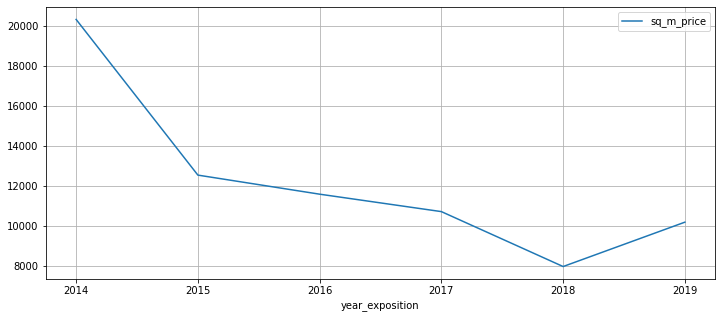

In [23]:
data.pivot_table(index='year_exposition', values='sq_m_price', aggfunc=('min')).plot(grid=True, figsize=(12, 5))



<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

Не забывай пожалуйста подписавать каждый график. Это важный момент всего проект, потому что так быстрее понять о чем идёт речь на графике.

</div>

На графике сверху видим изменение минимальной цены проданых квартир за 1м2 по годам

<AxesSubplot:xlabel='year_exposition'>

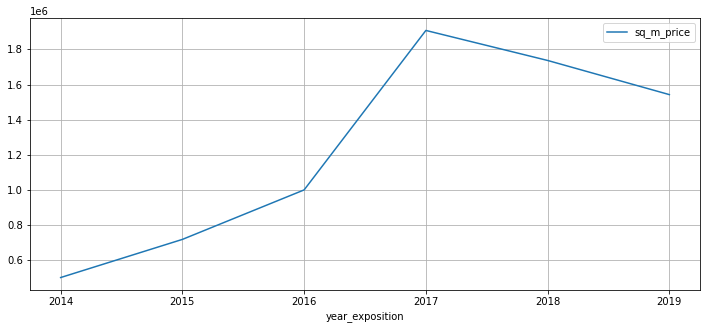

In [24]:
data.pivot_table(index='year_exposition', values='sq_m_price', aggfunc=('max')).plot(grid=True, figsize=(12, 5))

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

На графике сверху видим изменение максимальной цены проданых квартир за 1м2 по годам

<AxesSubplot:xlabel='year_exposition'>

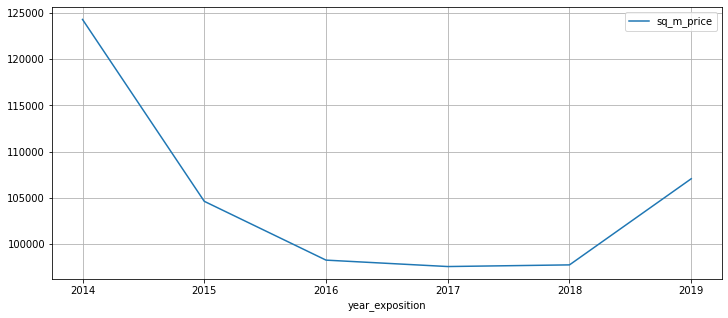

In [25]:
data.pivot_table(index='year_exposition', values='sq_m_price', aggfunc=('mean')).plot(grid=True, figsize=(12, 5))

на графике сверху Видим на графике спад среднией цены за 1 м2 до 2018 года и потом небольшой оскок

In [26]:
data.groupby('year_exposition')['sq_m_price'].count()

year_exposition
2014     136
2015    1165
2016    2742
2017    8157
2018    8480
2019    2867
Name: sq_m_price, dtype: int64

In [27]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,week_day_exposition,month_exposition,year_exposition,floor_type,km_cityCenters_nearest
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,482.00,2.00,755.00,NaN,"120,370.37",3,3,2019,другой,16.03
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,NaN,0.00,NaN,81.00,"82,920.79",1,12,2018,первый,18.60
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,90.00,2.00,574.00,558.00,"92,785.71",3,8,2015,другой,13.93
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,False,...,84.00,3.00,234.00,424.00,"408,176.10",4,7,2015,другой,6.80
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,112.00,1.00,48.00,121.00,"100,000.00",1,6,2018,другой,8.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5.00,73.30,3,False,...,796.00,3.00,381.00,NaN,"72,490.85",1,3,2017,другой,4.23
23543,14,"3,100,000.00",59.00,2018-01-15,3,NaN,5.00,38.00,4,False,...,NaN,NaN,NaN,45.00,"52,542.37",0,1,2018,другой,NaN
23544,18,"2,500,000.00",56.70,2018-02-11,2,NaN,3.00,29.70,1,False,...,NaN,NaN,NaN,NaN,"44,091.71",6,2,2018,первый,NaN
23545,13,"11,475,000.00",76.75,2017-03-28,2,3.00,17.00,NaN,12,False,...,173.00,3.00,196.00,602.00,"149,511.40",1,3,2017,другой,10.36


<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

Кажется проект доделан не до конца, сделай пожалуйста все основные блоки задания, чтобы я смог до конца его проверить.
</div>

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод